In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
#FUNCIONES

#funcion para obtener distancias
def dist(x_d,x_r,y_d,y_r):
    dis=np.sqrt((x_d - x_r)**2 + (y_d-y_r)**2)
    return dis

#estimador Landy-Zslay
def LZ(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrLZ= (corr_D+corr_R-2*corr_DR)/corr_R
    return corrLZ

#Estimador Hewett
def HEW(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrHEW= (corr_D-corr_DR)/corr_R
    return corrHEW

#Estimador David & Peebles
def DP(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrDP= (corr_D/corr_DR)-1
    return corrDP

#Estimador Hamilton
def HAM(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrHAM= (corr_D*corr_R)/(corr_DR)**2 -1
    return corrHAM

In [9]:

#definir distancias, los datos se encuentran en un solo arreglo
def D_RR(x,y,N1,D):
    for i in range(N1): 
        for j in range(i+1,N1):
            DD=dist(dat[0][i],dat[0][j],dat[1][i],dat[1][j]) #distancias
            indice1=int(DD//tbin)  #checar bin
          
            ContD[indice1]=ContD[indice1]+1 #Contador de indices
            
    #DD=ContD/D
           
    return ContD

def D_DR(dat, dat_r,N1,N2,ContD,tbin ):
    for i in range(N1):
    
        for j in range(N2):
            DR= dist(dat[0][i],dat_r[0][j],dat[1][i],dat_r[1][j])
            indice3=int(DR//tbin)      
            ContDR[indice3]=ContDR[indice3]+1
    #DR=ContDR/D
            
    return ContDR

#funcion de parametros de correlacion
def DD(dat,N1,Histo1,tbin,ND_D):
    d=dist(dat,N1,Histo1,tbin)/ND_D
    return d

def RR(dat_r,nr,Histo2,tbin, ND_R):
    rr=distancias2d(random,nr,Histo2,tbin)/ND_R
    return rr

def DR(dat,dat_r,N1,N2,Histo3,tbin,ND_DR):
    dr=distancias2ddr(datos,random,nd,nr,Histo3,tbin)/ND_DR
    return dr

In [22]:
L=100 #tamanio caja
np.random.seed(0)


#bins
bins=np.linspace(0.,np.sqrt(2.)*L,20)

#arreglo  datos disco en polares
N1=1000 #puntos de datos
ND_D=N1*(N1-1)/2 #distancias datos
ri=0.5 #radio interior
re=1. #radio exterior

c_x=50. #centrado x
c_y=50.#centrado y

r_ani=2*np.pi*np.random.uniform(ri,re,N1)#*L  #puntos sobre radio anillo
phi= 2 * np.pi * np.random.rand(N1) #angulo polares
x_d= r_ani*np.cos(phi)+c_x #coordenada x
y_d=r_ani*np.sin(phi)+c_y #coordenada y
dat=(x_d,y_d)


#arreglo aleatorio 
N2=5*N1 #puntos aleatorios
ND_R=N2*(N2-1)/2 #distancias aleatorias


x_r = L*np.random.uniform(-1.,1.,N2)
y_r= L*np.random.uniform(-1.,1.,N2)
dat_r=(x_r,y_r)


ND_DR=N1*N2 #distancias entre datos y aleatorios

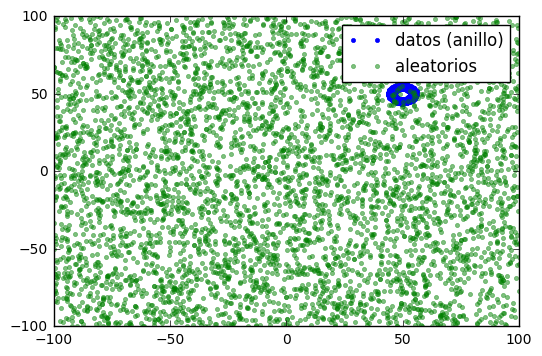

In [23]:
plt.plot(dat[0][:],dat[1][:],'.',label='datos (anillo)')
plt.plot(dat_r[0][:],dat_r[1][:],'.',label='aleatorios', alpha=0.5)

plt.legend()

In [ ]:
#agregar peso w=1 para todos x<50 y w=2 para x>50
